<h2> Ćwiczenia 8 - dokładniej o geometrii i atrybutach obiektów wektorowych </h2>

Na ostatnich ćwiczeniach ładowaliśmy warstwy, dokonywaliśmy selekcji i uzyskiwaliśmy dostęp do wartości używając klas warstw wektorowych, rastrowych, projektu QGIS oraz dataProvider przekazującego dane. Na wykładzie 4 pokazane były metody dodawania obiektów, atrybutów, modyfikacje geometrii oraz trzy nowe, ważne klasy. Podsumowując:

Dotychczas mówiliśmy o klasach:

    QgsProject - klasa projektu

    QgsVectorLayer - klasa warstwy wektorowej

    QgsRaterLayer - klasa warstwy rastrowej

    QgsFeature - klasa obiektu warstwy wektorowej

    QgsField - klasa pola wartości w atrybutach warstwy wektorowej

    QgsGeometry - klasa geometrii obiektu
    
    QVariant - klasa typu danych

    iface - odwołanie do klasy interfejsu aplikacji,

Klasy geometrii:

    QgsPoint, QgsPointXY,

    QgsPolygonXY

    QgsPolylineXY

Oraz ważnej metodzie dataProvider() dającej dostęp do danych i właściwości obiektów warstw.

Poznaliśmy również sposoby tworzenia geometrii:

    z koordynatów:
        
        punkt = QgsGeometry.fromPointXY(QgsPointXY(1,1)) #Różnica między QgsPoint a QgsPointXY jest taka, że pierwsza wspiera wymiar Z lub M
        
        linia = QgsGeometry.fromPolyline([QgsPoint(1,1), QgsPoint(2,2)])
        
        polygon = QgsGeometry.fromPolygonXY([[QgsPointXY(1,1),QgsPointXY(2,2), QgsPointXY(2,1)]])
    
    Z WKT:

        gem = QgsGeometry.fromWkt("POINT(3 4)")

    Z WKB (tego nie było, uzupełniam z ciekawości, nie będziemy stosować):

        wkb = bytes.fromhex("010100000000000000000045400000000000001440") g.fromWkb(wkb)
        
PS. Na pisanie wtyczki jeszcze przyjdzie czas :)


Dodajmy jeszcze do powyższych funkcje dostępu do geometrii:

<h3> Dostęp do geometrii: </h3>

    geometria.asPoint()
    
    geometria.asMultiPoint()
    
    geometria.asPolyline()
    
    geometria.asMultiPolyline()
    
    geometria.asPolygon()
    
    geometria.asMultiPolygon()
    
    geometria.asWkt()
    
    geometria.asWkb()
    

Sprawdźmy to praktyce na paru przykładach. Ładuję do QGIS warstwę Budybki_JG.shp (dołączone do ćwiczeń). Poniżej zamieszczam kod i wyniki, do własnego przetestowania.

Na początku otwieram okno konsoli Pythona i edytora:

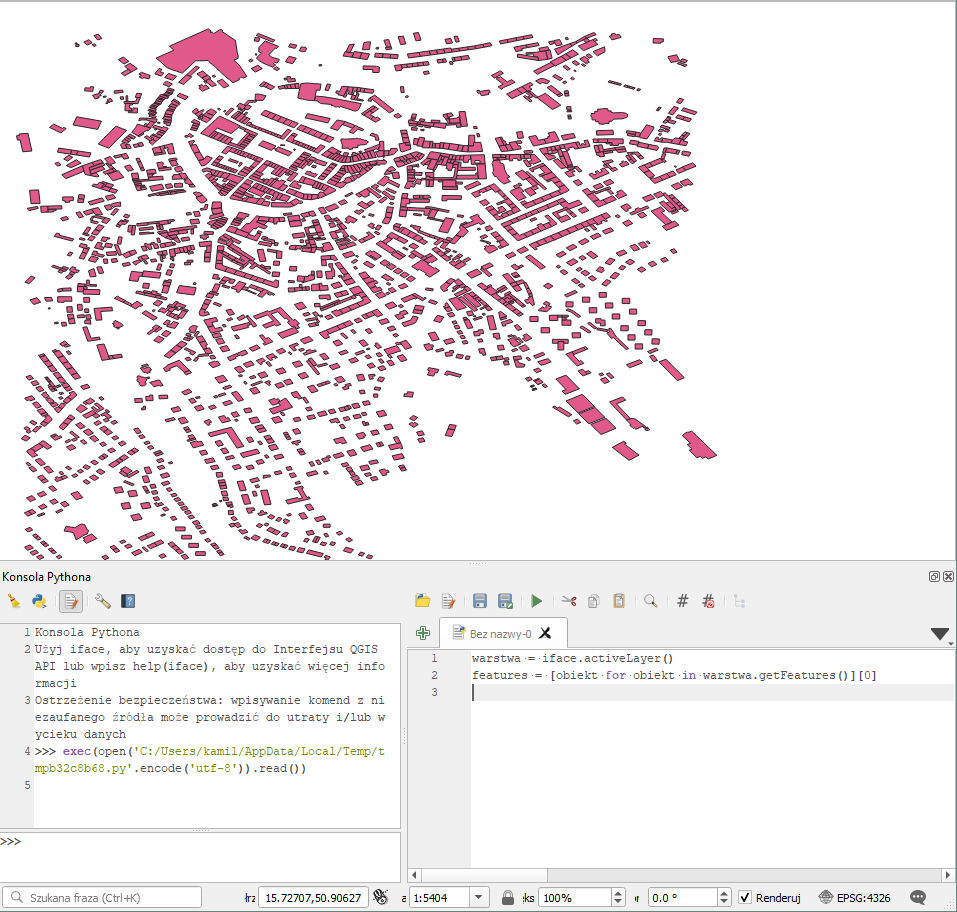

In [4]:
from IPython.display import Image #wiadomo - import obrazów
Image('1.png')

Zacznijmy od wybrania jednego obiektu z warstwy:

In [ ]:
warstwa = iface.activeLayer()
features = [obiekt for obiekt in warstwa.getFeatures()]
pierwszy_obiekt = features[0] #pierwszy obiekt


Odczytujemy jego geometrię:

In [ ]:
geom = pierwszy_obiekt.geometry()

print(geom) zwraca:

<QgsGeometry: MultiPolygon (((15.7402792999999992 50.9030161000000021, 15.74068950000000022 50.90302559999999943, 15.74071329999999946 50.90275609999999773, 15.74046760000000056 50.90274749999999671, 15.74030860000000054 50.90274089999999774, 15.7402792999999992 50.9030161000000021),(15.74040630000000007 50.90285010000000199, 15.74041360000000012 50.90277679999999805, 15.74056419999999967 50.90278289999999828, 15.74055689999999963 50.90285620000000222, 15.74040630000000007 50.90285010000000199)))>

A to już jak wiemy, zostało zdefiniowane w metodzie __str__ klasy QgsGeometry.

Spójrzmy teraz na inne reprezntacje:

In [ ]:
print(geom.asMultiPolygon()) #oczywiście każda metoda jest do wyświetlania innych obiektów

Musieliśmy zastosować metodę MultiPolygon - jak widać z print(geom) z taką geometrią mamy do czynienia. Wynik:

[[[<QgsPointXY: POINT(15.7402792999999992 50.9030161000000021)>, <QgsPointXY: POINT(15.74068950000000022 50.90302559999999943)>, <QgsPointXY: POINT(15.74071329999999946 50.90275609999999773)>, <QgsPointXY: POINT(15.74046760000000056 50.90274749999999671)>, <QgsPointXY: POINT(15.74030860000000054 50.90274089999999774)>, <QgsPointXY: POINT(15.7402792999999992 50.9030161000000021)>], [<QgsPointXY: POINT(15.74040630000000007 50.90285010000000199)>, <QgsPointXY: POINT(15.74041360000000012 50.90277679999999805)>, <QgsPointXY: POINT(15.74056419999999967 50.90278289999999828)>, <QgsPointXY: POINT(15.74055689999999963 50.90285620000000222)>, <QgsPointXY: POINT(15.74040630000000007 50.90285010000000199)>]]]

Jakie daje nam to możliwości? Widzimy że dostaliśmy listę (zagnieżdżoną) obiektow klasy QgsPointXY - w ten sposób mamy dostęp do każdego wierzchołka geometrii obiektu.

Przyjrzyjmy się tej liście. Widzimy że jest zagnieżdżona 3-krotnie:

Poziom 1 - bo MultiPolygon - czyli może zawierać wiele wieloboków
Poziom 2 - bo uwzględnia "otwory" w geometrii
Poziom 3 - przechowuje kolejne wierzchołki.

Na poziomie 1 mamy tylko jeden obiekt. Na poziomie 2 mamy dwie listy - pech (lub szczęście) chciało, że pierwszy obiekt jest geometrią z otworem. Dobrze zatem widać, jak działa definicja geometrii wieloboku. Nasz obiekt wygląda tak:

(Ps. wybrałem go za pomocą polecenia warstwa.selectByIds([pierwszy_obiekt.id()]) - wtedy podświetla się na mapie)

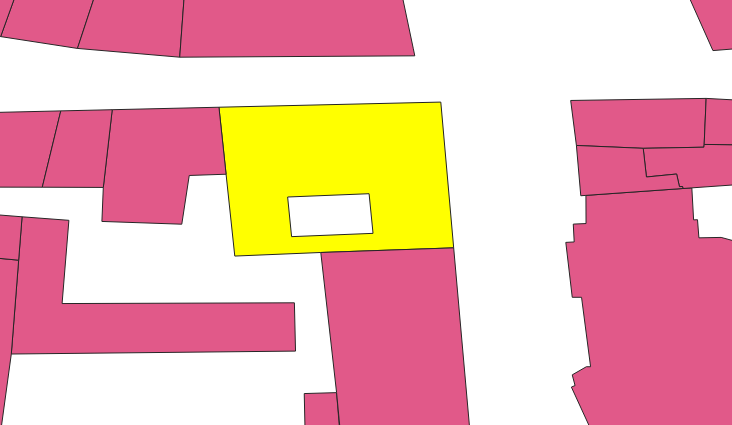

In [8]:
Image('2.png')

Aby dostać się do wierzchołka obiektu należy skorzystać indeks. Na przykład pierwszy wierzchołek otworu:

In [ ]:
print(geom.asMultiPolygon()[0][1][0])

Sprwadźmy jeszcze reprezentację WKT:

In [ ]:
print(geom.asWkt())

MultiPolygon (((15.7402792999999992 50.9030161000000021, 15.74068950000000022 50.90302559999999943, 15.74071329999999946 50.90275609999999773, 15.74046760000000056 50.90274749999999671, 15.74030860000000054 50.90274089999999774, 15.7402792999999992 50.9030161000000021),(15.74040630000000007 50.90285010000000199, 15.74041360000000012 50.90277679999999805, 15.74056419999999967 50.90278289999999828, 15.74055689999999963 50.90285620000000222, 15.74040630000000007 50.90285010000000199)))

Reprezentacja WKB za wiele nam nie powie (tylko tyle, że jest to binarna reprezentacja):

In [ ]:
print(geom.asWkb())

b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x02\x00\x00\x00\x06\x00\x00\x00\xc1\xcfn\xe3\x05{/@x\xa1\x14\x08\x96sI@/\xfbu\xa7;{/@\xb3\xb9\xc5W\x96sI@\xaal\x0e\xc6>{/@\xdb\xe1\n\x83\x8dsI@\xc7~\xbb\x91\x1e{/@\xdb\x85\xe6:\x8dsI@%\xe5\x93\xba\t{/@|!\x89\x03\x8dsI@\xc1\xcfn\xe3\x05{/@x\xa1\x14\x08\x96sI@\x05\x00\x00\x006\x81\xd8\x88\x16{/@]X\x92\x97\x90sI@\xfa\x06\xcb}\x17{/@4\xcb\xaf0\x8esI@C-\x17;+{/@\xabq\xdbc\x8esI@\x7f\xa7$F*{/@\xd4\xfe\xbd\xca\x90sI@6\x81\xd8\x88\x16{/@]X\x92\x97\x90sI@'

Dobrze, ale po co nam to?

W ten sposób możemy wygodnie kopiować i zmieniać geometrię obiektów w QGIS. Tak jak w zadaniu 3 z listy 6.
Zobaczmy na innym przykładzie (komentarze opisują proces):

In [ ]:
warstwa = iface.activeLayer() #obecna warstwa
features = [obiekt for obiekt in warstwa.getFeatures()] #iteracja przez obiektu
pierwszy_obiekt = features[0] #pierwszy obiekt

geom = pierwszy_obiekt.geometry() #pobieramy geometrię
nowa_geometria = [] #szykujemy listy na nową geometrię
nowy_otwor = []

for obiekt in geom.asMultiPolygon(): #iteracja przez obiekty w MultiPolygon (jest 1)
    nowa_geometria.append(obiekt[0]) #obrys sobie przepisujemy
    for wierzcholek in obiekt[1]: #Iteracja przez wierzcholki otworu
        wierzcholek.setX(wierzcholek.x()+.1) #Przesuwamy wspolrzedna X o .1 (w stopniach)
        nowy_otwor.append(wierzcholek) #dodajemy zmienioną geometrię do listy

nowa_geometria.append(nowy_otwor) #dodajemy zmieniony otwor do listy z nową geometrią
nowa_geometria = QgsGeometry.fromPolygonXY(nowa_geometria) #i tworzymy z niej klasę QgsGeometry

warstwa.dataProvider().changeGeometryValues({0: nowa_geometria}) #zmieniamy geometrię obiektu

W rezultacie zmieniliśmy geometrię otworu. Tak naprawdę odsunęliśmy trochę za daleko i znikł :)

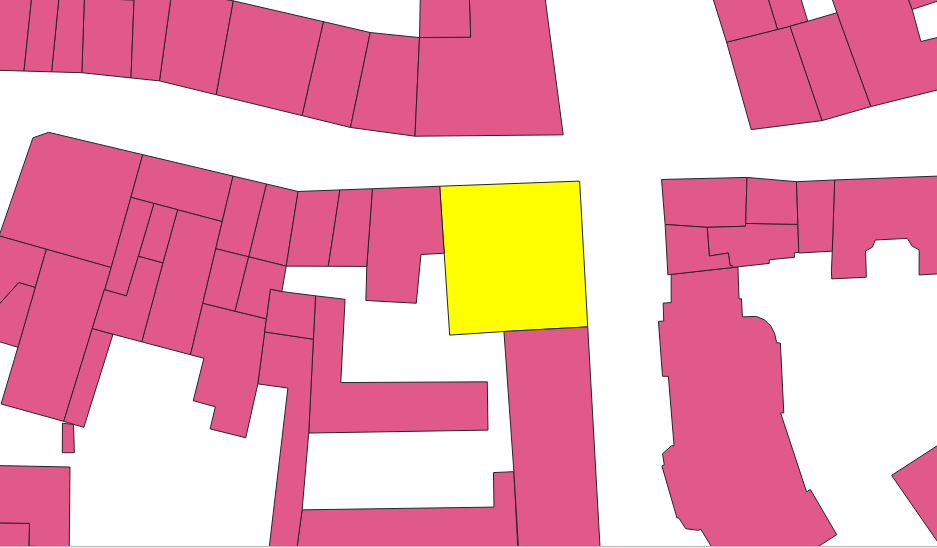

In [10]:
Image('3.png')

<h3> Sprawdzanie typu geometrii </h3>

Wykorzystujemy do tego zapytanie wkbType(), które wykonujemy na geometrii. Zwracana jest enumeracja z definicjki klasy QgsWkbTypes. Dla naszego obiektu:

In [ ]:
print(geom.wkbType())

Zwraca: 6

Zaglądamy do dokumentacji i widzimy, że 6 = MultiPolygon


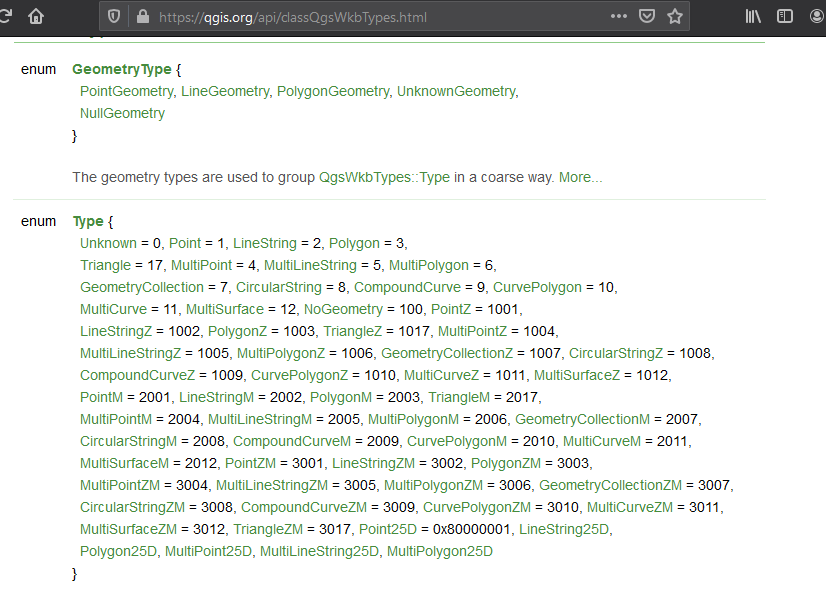

In [11]:
Image('4.png')

Chcielibyśmy to robić jednak programistycznie. Możemy sprawdzić geometrię warunkiem i otrzymać wartośc logiczną poprzez odwołanie się do klasy QgsWkbTypes. Na przykład nasza geometria powinna zwrócić True dla QgsWkbTypes.MultiPolygon:

    geom.wkbType() == QgsWkbTypes.Point

    geom.wkbType() == QgsWkbTypes.LineString

    geom.wkbType() == QgsWkbTypes.Polygon

    geom.wkbType() == QgsWkbTypes.MultiPolygon

Zwraca:

    False

    False

    False

    True

Samo QgsWkbTypes.MultiPolygon zwraca po prostu cyfrę 6.

<h3> Operatory geometrii </h3>

QGIS udostępnia narzędzia analizy przestrzennej wprost w formie metod. Pozwalają na wykonywanie operacji analizy przestrzennej bezpośrednio w Pythonie QGISa. Metody te to:

Zwracające informację:

    area - zwraca powierzchnię
    length - zwraca długość obiektu
    centroid - zwraca centroid obiektu
    
Zwracające geometrię:

    buffer - tworzy bufor
    combine - zwraca sumę obiektów
    intersection - zwraca przeciecie obiektow
    
Zwracają wartośc logiczną:

    compare - porównuje geometrię
    contains - sprawdza czy jeden obiekt zawiera drugi
    crosses - sprawdza czy jeden obiekt przecina drugi
    equal - sprawdza czy obiekty sa takie same
    disjoint - sprawdza czy obiekty sa rozlaczne
    distance - sprawdza czy obiekty sa w zakresie pewnego dystanu
    intersects - sprawdza czy obiekty sie przecinaja
    overlaps - sprawdza czy obiekty sie nakladaja
    touches - sprawdza czy obiekty sie stykają
    within - sprawdza czy obiekt jest zawarty w innym obiekcie

Zacznijmy od operatorów zwracających informację o pojedynczym obiekcie. Używaliśmy ich już wczesniej:

In [ ]:
print(geom.area())
print(geom.length())
print(geom.centroid())

    1.2225330000197065e-07 - powierzchnia budynku w mierze stopniowej
    0.0018113738023408103 - obwód w mierze stopniowej
    <QgsGeometry: Point (15.74956188262261669 50.90287886603740475)> - centroid w aktualnym układzie

Utworzymy teraz bufory pierwszych 50 budynków z wykorzystaniem warswy tymczasowej i metody buffer.

In [ ]:
warstwa = iface.activeLayer() #akutalna warstwa
features = [obiekt for obiekt in warstwa.getFeatures()][:50] #50 obiektów
nowe = [] #lista z nowymi obiektami
for x in features: #iteracja po obiektach
    new_geom = x.geometry().buffer(0.0004,-1) #robimy bufor na 0.0004 stopnia kątowego - 1 onacza liczbe segmentow - możlwie wiele
    nowe.append(new_geom) #dodajmy geometrię do listy
    
mem_layer = QgsVectorLayer("Polygon","Buffer","memory") #tworzymy warstwę tymczasową
pr = mem_layer.dataProvider() #przez dataProvider
for n in range(len(nowe)): 
    bufor = QgsFeature(n) #tworzmy nowe obiekty o indeksie rosnącym
    bufor.setGeometry(nowe[n]) #ustalamy ich geometrię z listy
    pr.addFeatures([bufor]) #dodajemy przez dataProvider do warstwy
QgsProject.instance().addMapLayer(mem_layer) #dodajemy warstwę do okna mapy

Wynik:

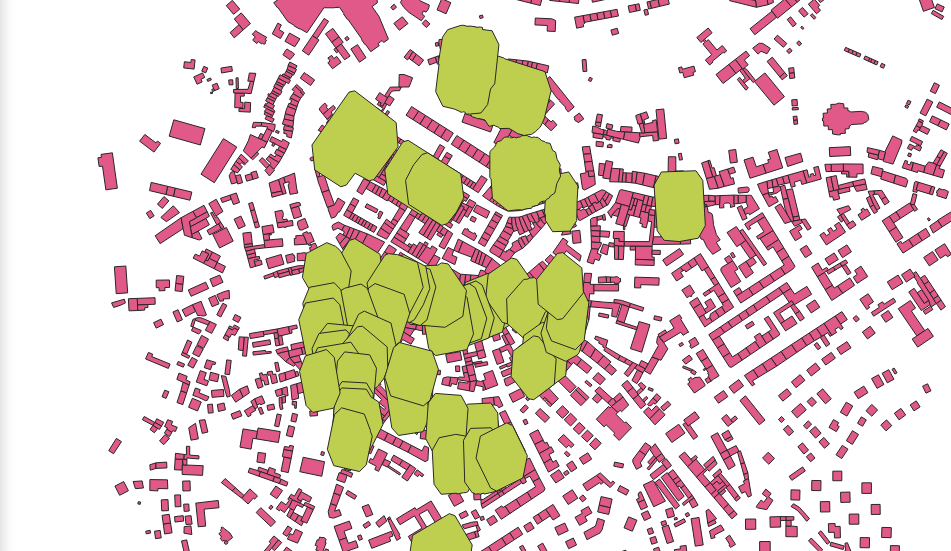

In [12]:
Image('5.png')

Metoda intersection - przecięcie wymaga podania dwóch geometrii. Wykorzystajmy  nasze bufory, które niewątpliwie się pokrywają, żeby dokonać przecięcia. W poniższym przykładzie przecinamy tylko obiekty o sąsiadujących indeksach, a zatem obiekt 1 z 2, 2 z 3 itd. Przecięcie wszystkich wymagałoby utworzenia par wszystkich kombinacji indeksów.

In [ ]:
warstwa = iface.activeLayer() #zaznaczamy warstwę bufory w oknie Warstwy
features = [obiekt for obiekt in warstwa.getFeatures()][:50]
nowe = []
for x in range(len(features)-1): #po indeksach listy  - 1, bo x+1 spowodowałoby wyjście poza indeksy
    new_geom = features[x].geometry().intersection(features[x+1].geometry()) #przecięcie geometrii x z x+1
    nowe.append(new_geom)
    

mem_layer = QgsVectorLayer("Polygon","Buffer_Intersection","memory") #warstwa tymczasowa j.w.
pr = mem_layer.dataProvider()
for n in range(len(nowe)):
    bufor = QgsFeature(n)
    bufor.setGeometry(nowe[n])
    pr.addFeatures([bufor])
QgsProject.instance().addMapLayer(mem_layer)

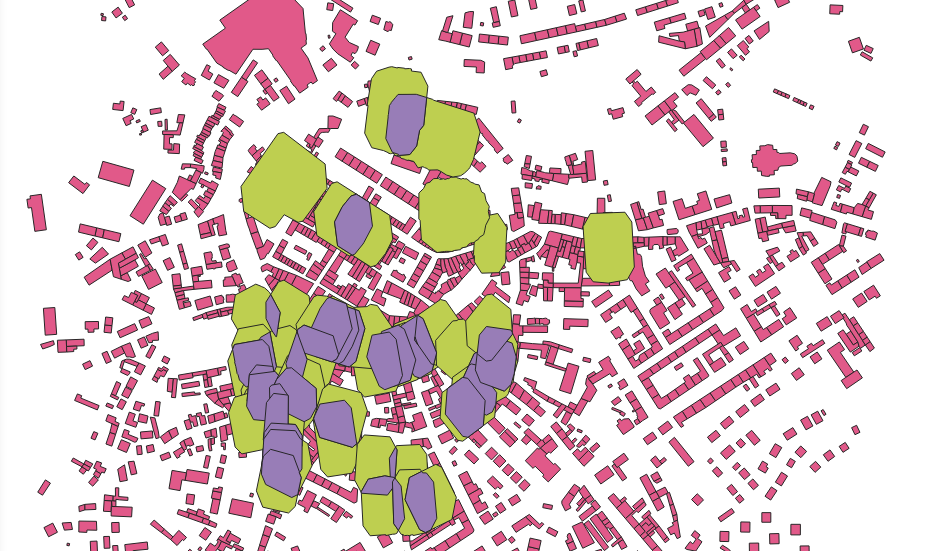

In [13]:
Image('6.png')

Trzecia grupa metod to operatory logiczne geometrii. Zwracana jest wartość logiczna - True lub False. Sprawdźmy czy na warstwie Budynki jest jakiś budynek, który się przecina z innym.

In [ ]:
import numpy as np #skorzystamy z Numpy, żeby sprwadzić czy budynki się przecinają.

warstwa = iface.activeLayer() #tym razem Budynki_JG
features = [obiekt for obiekt in warstwa.getFeatures()][:50]
lista_przeciec = []
for x in range(len(features)):
    for y in range(len(features)):
        if x != y: #żeby nie przecinał ze sobą tych samych obiektów
            if_true = features[x].geometry().intersects(features[y].geometry()) 
            lista_przeciec.append(if_true)

print(np.array(lista_przeciec).any())

Otrzymujemy True, więc coś się przecina. Możemy sprawdzić w którym miejscu listy:

In [ ]:
print(np.where(np.array(lista_przeciec) == True))

    (array([ 300,  349,  800,  849,  950,  999, 1150, 1199, 1300, 1349, 1350,
       1399, 1950, 1999], dtype=int64),)
       
Oczywiście są to indeksy listy, nie indeksy obiektów. Należałoby połączyć indeks listy z obiektami.

<h2> Na marginesie - wszystko otrzymujemy w jednostkach kątowych. Jak przejśc na metry? </h2>

Oczywiście nie jest to problem, kiedy wrastwa jest w układzie metrycznym. Co w sytuacji, kiedy jednak jesteśmy w układzie WGS84?

1. Konwertować wszystkie warstwy do układu metrycznego poprzez ich zapis,
2. Konwertować tymczasowo w projekcie,
3. W przypadku długości, odległości skorzystać z klasy QgsDistanceArea

Zacznijmy od nr 3:

In [ ]:
warstwa = iface.activeLayer()
features = [obiekt.geometry() for obiekt in warstwa.getFeatures()][:50]

d = QgsDistanceArea() #nowa klasa - klasa pomiaru odległości lub obszaru
d.setEllipsoid('WGS84') #wybieramy elipsoidę na której mierzymy

for x in features:
    print(d.measureArea(x)) #metoda pomiaru powierzchni, domyślnie w metrach

Możemy obliczać powierzchnię w innych jednostkach:

In [ ]:
warstwa = iface.activeLayer()
features = [obiekt.geometry() for obiekt in warstwa.getFeatures()][:5]

d = QgsDistanceArea()
d.setEllipsoid('WGS84')
d.areaUnits()

for x in features:
    pomiar = d.measureArea(x)
    akry = d.convertAreaMeasurement(pomiar, QgsUnitTypes.AreaUnit(6)) #określamy jednostkę, tu w akrach
    print(akry)

Jednostki, z których możemy skorzystac znajdziemy w dokumentacji:

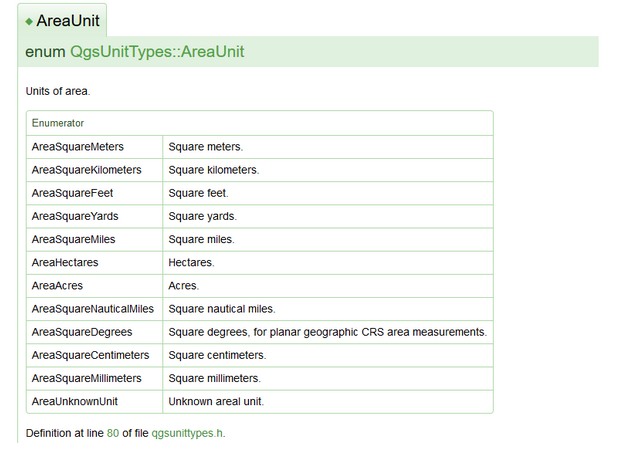

In [14]:
Image('7.png')

Dla długości metoda to measureLength(), resztę wykonujemy analogicznie.

<h4> Nr 2 czyli Transformacje </h4>

Nowa klasa układu odniesienia:
     
    QgsCoordinateReferenceSystem

Definiowanie układu:

In [ ]:
uklad = QgsCoordinateReferenceSystem(4326, QgsCoordinateReferenceSysten.PostgisCrsId)
#Definiujemy uklad na podstawie id jak w PostGIS

In [ ]:
wgs = QgsCoordinateReferenceSystem(4326,QgsCoordinateReferenceSystem.EpsgCrsId)
#Lub na podstawie numery EPSG

Układ naszej obecnej warstwy to (podaje EPSG):

In [ ]:
warstwa.crs()

<QgsCoordinateReferenceSystem: EPSG:4326>

Z klasy możemy pozyskać atrybuty:

    uklad.srsid() - EPSG

    uklad.postgisSrid() - ID układu z PostGIS

    uklad.description() - opis
   
    uklad.mapUnits() - jednostka układu, zgodnie z enumeracją z dokumentacji (https://qgis.org/api/classQgsUnitTypes.html#a0602e8a06afd37c267e9e532bb27f50d  - tutaj 6 = kątowa)

Proces transformacji jak poniżej:

In [ ]:
z = QgsCoordinateReferenceSystem(4326) #domyślnie EPSG
do = QgsCoordinateReferenceSystem(2177) #uklad2000

transformacja = QgsCoordinateTransform(z,do, QgsProject.instance()) 
#przygotowujemy transformację w projekcie

warstwa = iface.activeLayer()
features = [obiekt.geometry() for obiekt in warstwa.getFeatures()][:50] #pierwsze 50 geometrii
for x in features:
    x.transform(transformacja) #dokonujemy transformacji
    print(x) #wyświetla nam się transformowana geometria
    

Transformujmy więc pierwsze 50 budynków na warstwę tymczasową:

In [ ]:
z = QgsCoordinateReferenceSystem(4326) #domyślnie EPSG
do = QgsCoordinateReferenceSystem(2177) #uklad2000

transformacja = QgsCoordinateTransform(z,do, QgsProject.instance()) 
#przygotowujemy transformację w projekcie

warstwa = iface.activeLayer()

nowa_warstwa = QgsVectorLayer("Polygon","nowa","memory")
nowa_warstwa.setCrs(do) #a co będzie bez? Tutaj ustalamy metadaną nowej warstwy, bez niej QGIS nie wie w jakim układzie jest warstwa == błąd

features = [obiekt for obiekt in warstwa.getFeatures()][:50] #tym razem lista obiektów nie geometrii!

for x in features:
    geometria = x.geometry()
    geometria.transform(transformacja)
    x.setGeometry(geometria) #nadpisujemy obiekt, stąd pobraliśmy listę obiektów
    
    nowa_warstwa.dataProvider().addFeatures([x]) #dodajemy obiekty do nowej warstwy - możemy tak, bo skopiowaliśmy całe obiekty
    
QgsProject.instance().addMapLayer(nowa_warstwa)

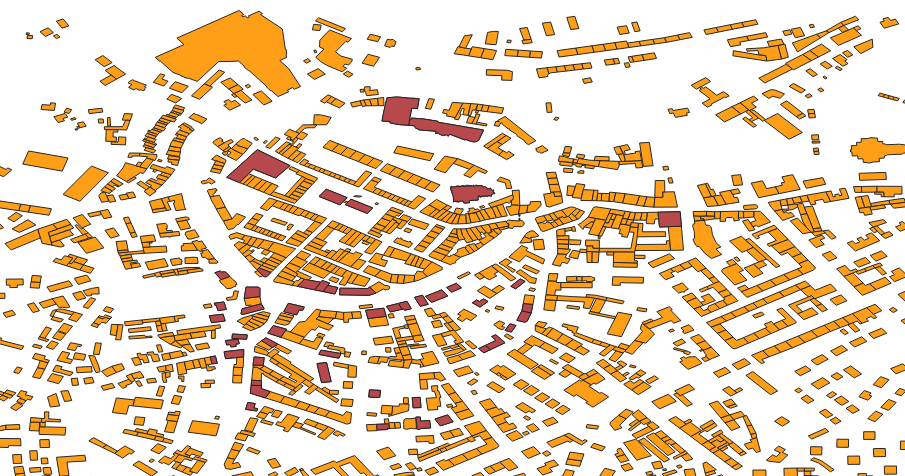

In [15]:
Image('8.png')

Transformowane obiekty podświetlone są innym kolorem. Oczywście dzięki transformacji w locie, znajdują się w tym samym miejscu.

<h3> Na dziś tyle </h3> Proszę spróbować uruchomić skrypty i samemu wykonać trzy małe zadania (nie podlegają ocenie):

1. Edytować geometrię innego obiektu (lub kilku obiektów) po transformacji budynków do układu metrycznego;
2. Sprwadzić inny  operator geometrii (np. combine)
3. 